In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.cross_validation as cv

from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('ideal_weight.csv')
df.head()

,id,sex,actual,ideal,diff
0,0,male,215,190,25
1,1,female,155,135,20
2,2,male,195,155,40
3,3,female,145,130,15
4,4,female,110,100,10


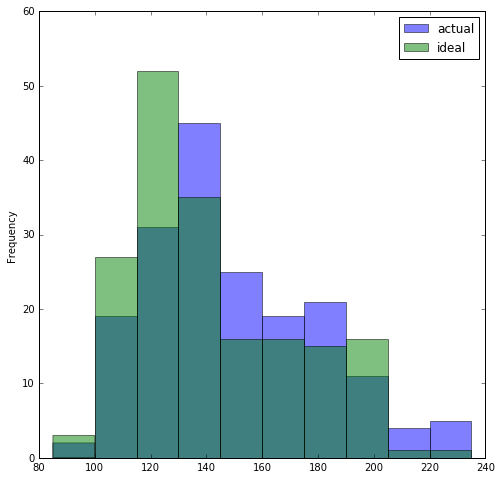

In [15]:
df[['actual', 'ideal']].plot(kind='hist', alpha=0.5, figsize=(8,8))

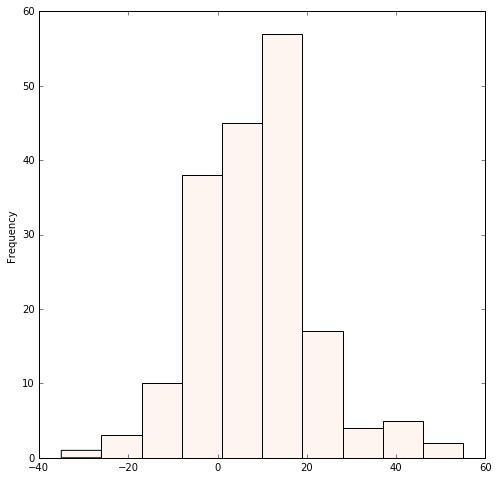

In [17]:
df['diff'].plot(kind='hist', colormap=plt.cm.Reds, figsize=(8,8))

In [18]:
df['sexcat'] = map(lambda sex: 1 if sex == 'female' else 0, df['sex'])

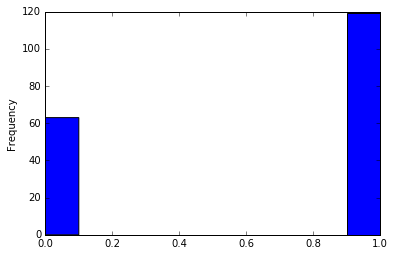

In [21]:
df['sexcat'].plot(kind='hist')

In [23]:
# Fit a naive bayes classifier that predicts sex from actual weight, ideal weight, and diff.
in_test                          = df[['actual', 'ideal','diff']]
out_test                         = df['sexcat']
X_train, X_test, y_train, y_test = cv.train_test_split(in_test, out_test)
clf                              = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [24]:
clf.score(X_test, y_test)

0.84782608695652173

In [34]:
# Predict sex for two different combinations of actual, ideal, and diff.
data = [
    [145, 160, -15],
    [160, 145,  15]
]
clf.predict(pd.DataFrame(data=data, columns=['actual', 'ideal', 'diff'])).tolist()

[0, 1]